In [84]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import stem
import numpy as np
from scipy import integrate
from scipy.signal import firwin , freqz , lfilter , hilbert
from scipy.fft import fft, fftfreq, fftshift , ifft

from numpy import cos
from numpy import sin
from numpy import pi

import IPython

### We define the Sampling characteristics

In [85]:
Fs = 44.1e3
Ts = 1/Fs


### We define the modulating signals

In [86]:
fm1 = 10
fm2 = 50

t = np.arange(0, 3/fm1 , Ts ) # 3-cycles of m1
m1 = 3 * cos(2*pi*fm1*t)
m2 = 5 * cos(2*pi*fm2*t)


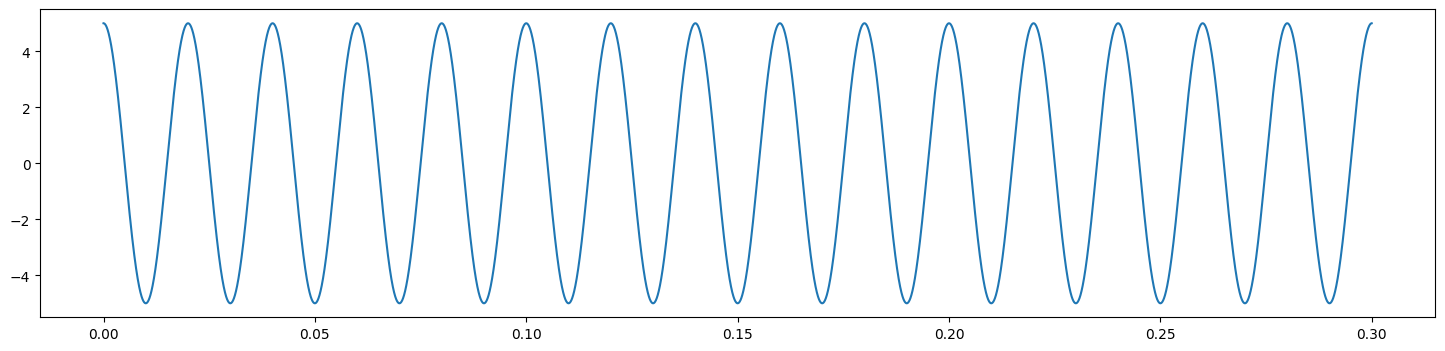

In [87]:
plt.rcParams["figure.figsize"] = (18,4)
plt.plot(t,m2)

Define the modulated the carrier signal frequency and amplitude

In [88]:
fc  = 2e3
ac =  1

carrier = ac * cos(2*pi*fc*t)
shifted_carrier = ac * sin(2*pi*fc*t)

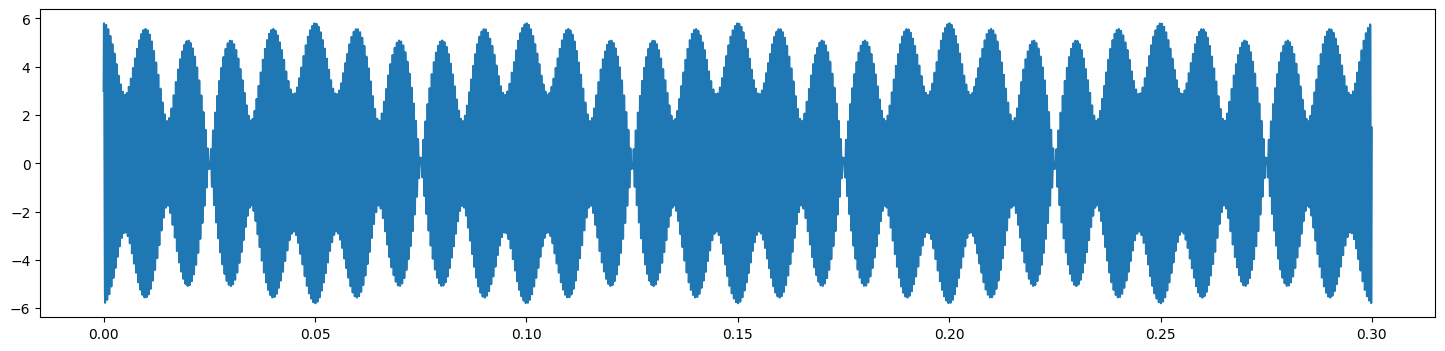

In [89]:
signal = (carrier * m1) + (shifted_carrier * m2)
plt.plot(t,signal)

### Transmitted Signal in frequency domain

In [90]:
def f(fr):
   return fr/(Fs/t.size)

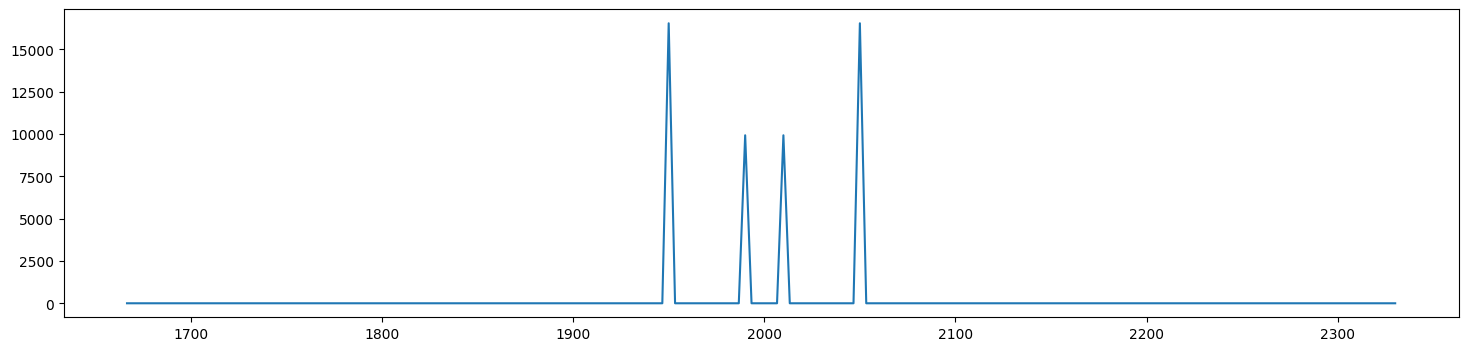

In [97]:
signal_spectrum = fftshift(np.abs(fft(signal)))
freq = fftshift(fftfreq(signal_spectrum.size, Ts))
c = 6615
plt.plot(freq[c+500:c+700], signal_spectrum[c + 500:c + 700])

### Recovering the messages

In [92]:
v1 = signal * carrier
v2 = signal * shifted_carrier

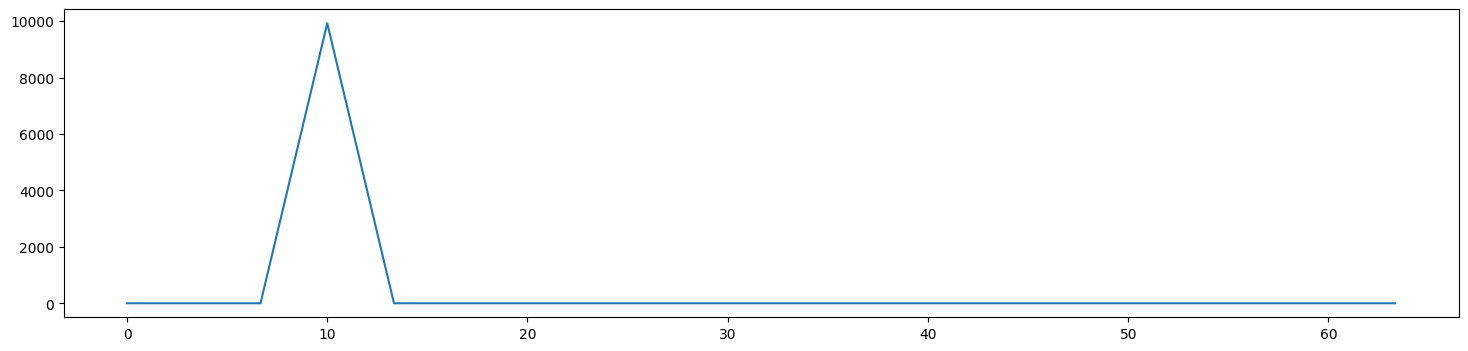

In [96]:
v1_spectrum = fftshift(np.abs(fft(v1)))
plt.plot(freq[c:c+20], v1_spectrum[c:c+20])

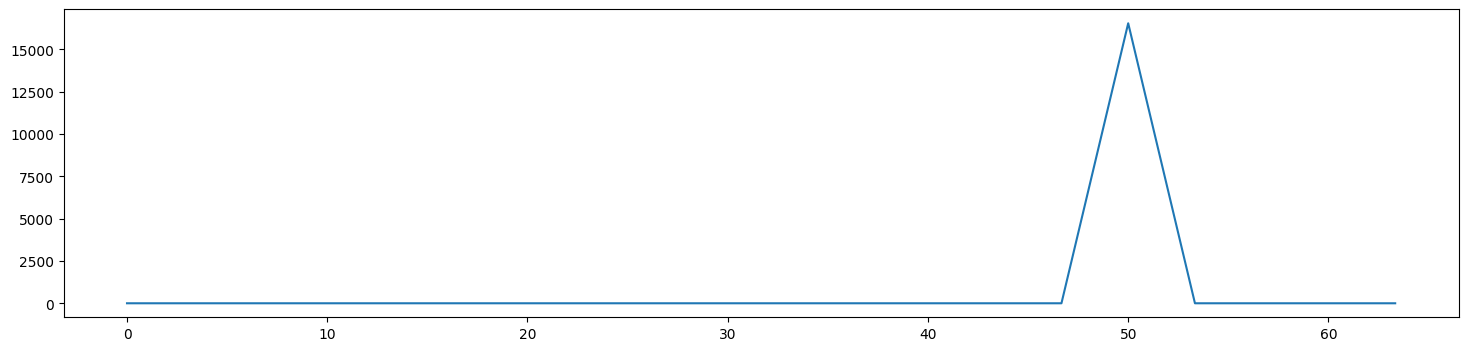

In [95]:
v2_spectrum = fftshift(np.abs(fft(v2)))
plt.plot(freq[c:c+20], v2_spectrum[c:c+20])